In [16]:
import numpy as np

import matplotlib

from matplotlib import colors, ticker, gridspec, rc, transforms
from matplotlib.ticker import PercentFormatter, LogFormatter, FuncFormatter, LogLocator, AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import Counter, OrderedDict
from mpl_toolkits.mplot3d import Axes3D


import os
from importlib import reload

import myfun as mf

# setup matplotlib latex use
#matplotlib.use('agg')
rc('text',usetex=True)
rc('text.latex', preamble=r'\usepackage{color}')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'


matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

import matplotlib.pyplot as plt
#from wordcloud import WordCloud
import time

from skimage import io, filters
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from scipy.cluster import hierarchy as hc

import cv2
from cv2 import connectedComponents as cc

from skimage import measure

In [433]:
datdir   = '/Users/simonfreedman/cqub/planaria/data/BMP_timeseries_stacks_111919'
modeldir = 'tvl_0h_15_model_2'
samp     = 'bmp_TVL_0h_14' #'bmp_TVL_0h_14'
bmp_str  = 'w103 Cy3'
outdir   = '{0}/{1}'.format(datdir,samp)
os.makedirs(outdir,exist_ok=True)


In [434]:
#seg = np.load('{0}/bmp_ilastik_seg.npy'.format(datdir))

In [435]:
seg_prob = np.load('{0}/{1}/{2}_{3}_Probabilities.npy'.format(datdir, modeldir, samp, bmp_str))
bmp_im1 = io.imread('{0}/{1}_{2}.TIF'.format(datdir,samp, bmp_str))

In [436]:
avgInt  = np.sum(bmp_im1,axis=0)
maxProj = np.max(bmp_im1,axis=0)

In [437]:
seg_prob.shape

(33, 1040, 1392, 3)

In [438]:
#np.unique(np.sort(bmp_im1.reshape(-1)))[1]

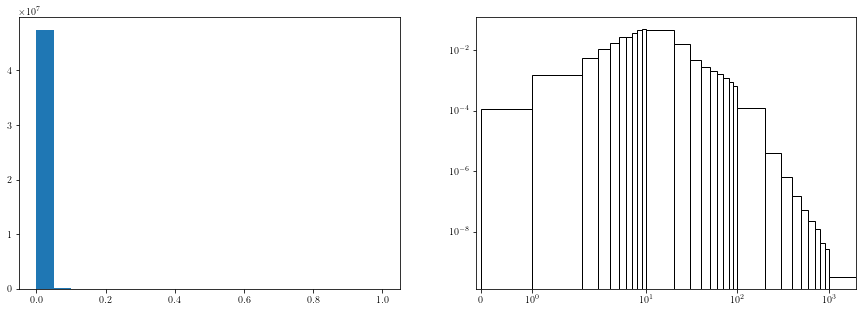

In [439]:
%matplotlib inline
fig,axs=plt.subplots(1,2,figsize=(15,5))
axs[0].hist(seg_prob[...,0].reshape(-1),20)
#bins = np.hstack([-0.0001,np.logspace(0,np.log10(2000),100)])
bins=np.hstack([np.arange(0,10),np.arange(10,100,10),np.arange(100,1000,100),[1000,2000]])
axs[1].hist(bmp_im1.reshape(-1),bins=bins,density=True,facecolor='white',edgecolor='black')
axs[1].set_xlim(-0.1,2000)
axs[1].set_yscale('log')
axs[1].set_xscale('symlog')

In [440]:
thresh = filters.threshold_otsu(seg_prob[...,0])
#thresh = 0.5
seg_prob_th = np.zeros_like(seg_prob,dtype=np.uint8)
seg_prob_th[np.where(seg_prob>thresh)] = 1

IndexError: index 16 is out of bounds for axis 0 with size 12

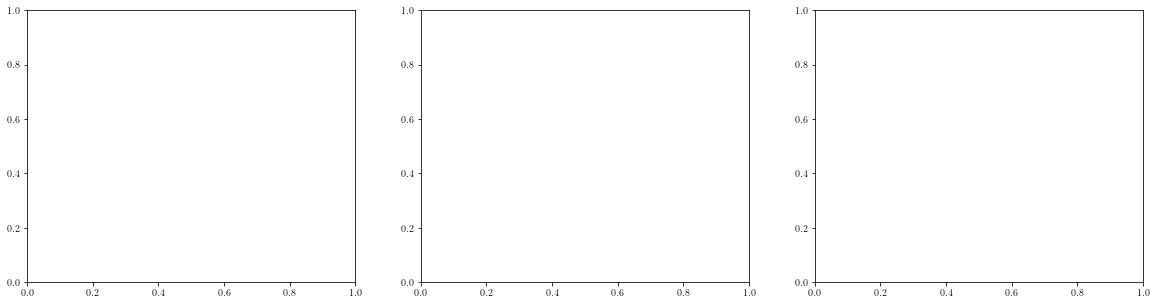

In [420]:
%matplotlib inline
fr = 16
fig,axs=plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(bmp_im1[fr,:,:])
#axs[1].imshow(seg[fr,:,:,0])
axs[1].imshow(seg_prob[fr,:,:,0])
axs[2].imshow(seg_prob_th[fr,:,:,0])

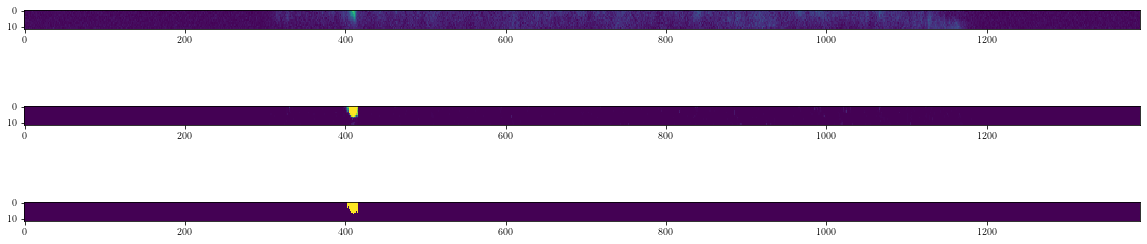

In [421]:
fr = 495
fig,axs=plt.subplots(3,1,figsize=(20,5))
axs[0].imshow(bmp_im1[:,fr,:],aspect=2,vmin=0,vmax=500)
#axs[1].imshow(1/seg[:,fr,:,0],aspect=2)
axs[1].imshow(seg_prob[:,fr,:,0],aspect=2)
axs[2].imshow(seg_prob_th[:,fr,:,0],aspect=2)

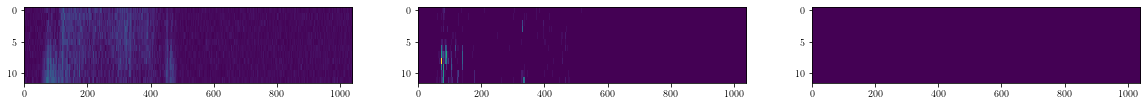

In [422]:
fr = 1200
fig,axs=plt.subplots(1,3,figsize=(20,15))
axs[0].imshow(bmp_im1[:,:,fr],aspect=20,vmin=0,vmax=500)
#axs[1].imshow(1/seg[:,:,fr,0],aspect=20)
axs[1].imshow(seg_prob[:,:,fr,0],aspect=20)
axs[2].imshow(seg_prob_th[:,:,fr,0],aspect=20)#,vmin=0.8,vmax=0.9000001)

In [423]:
# fr = 1200
# fig,axs=plt.subplots(3,1,figsize=(20,80))
# axs[0].imshow(np.sum(bmp_im1,axis=0),origin='lower')
# axs[1].imshow(np.sum(seg_prob[...,0],axis=0),origin='lower')
# axs[2].imshow(np.sum(seg_prob_th[...,0],axis=0),origin='lower')

# #,vmin=0.8,vmax=0.9000001)

In [424]:
#thresh=0.9
#sig_pixels = np.array(np.where(seg_prob_th[:,:,:,0]>0)).T

In [12]:
#pixel_labels = hc.fclusterdata(sig_pixels,1.1)

In [14]:
#seg_prob_th[16,:,:,0].shape

In [15]:
#np.where(seg_prob_th[16,:,:,0]==1)

In [17]:
#labels = np.zeros_like(seg_prob_th[:,:,:,0])

In [18]:
# dat = seg_prob_th[16:17,:,:,0]
# labels = np.zeros_like(dat)

# ret, labs = cc(dat,labels,8,cv2.CV_16U)

In [441]:
dat        = seg_prob_th[:,:,:,0]
all_labels = measure.label(dat)
nclusts    = np.max(np.unique(all_labels))+1

In [442]:
all_clusts = [[] for i in range(nclusts)]
dims = dat.shape
for i in range(dims[0]):
    for j in range(dims[1]):
        for k in range(dims[2]):
            all_clusts[all_labels[i,j,k]].append([i,j,k])
            

In [443]:
clust_lens = np.array(list(map(len,all_clusts)))

In [444]:
#clust_lens[1987]

In [445]:
# fig,axs=plt.subplots(1,1)
# axs.hist(clust_lens[1:],100)
# axs.set_yscale('log')
# axs.set_xscale('log')

In [446]:
thresh

0.40820312

In [447]:
#thresh = filters.threshold_otsu(clust_lens[1:])

thresh = 20
bigClustIdxs = np.where(clust_lens[1:]>thresh)[0]
clusts       = [np.array(all_clusts[i+1]) for i in bigClustIdxs]

# compute 2d hull coordinates
hulls2D        = [ConvexHull(clusts[i][:,1:]) for i in range(len(clusts))]
hull2Dvertices = [clusts[i][hulls2D[i].vertices,1:] for i in range(len(clusts))]
hull2Dvertices = [np.vstack([verts, verts[0]]) for verts in hull2Dvertices]
#hulls3D        = [ConvexHull(clust) for clust in clusts]

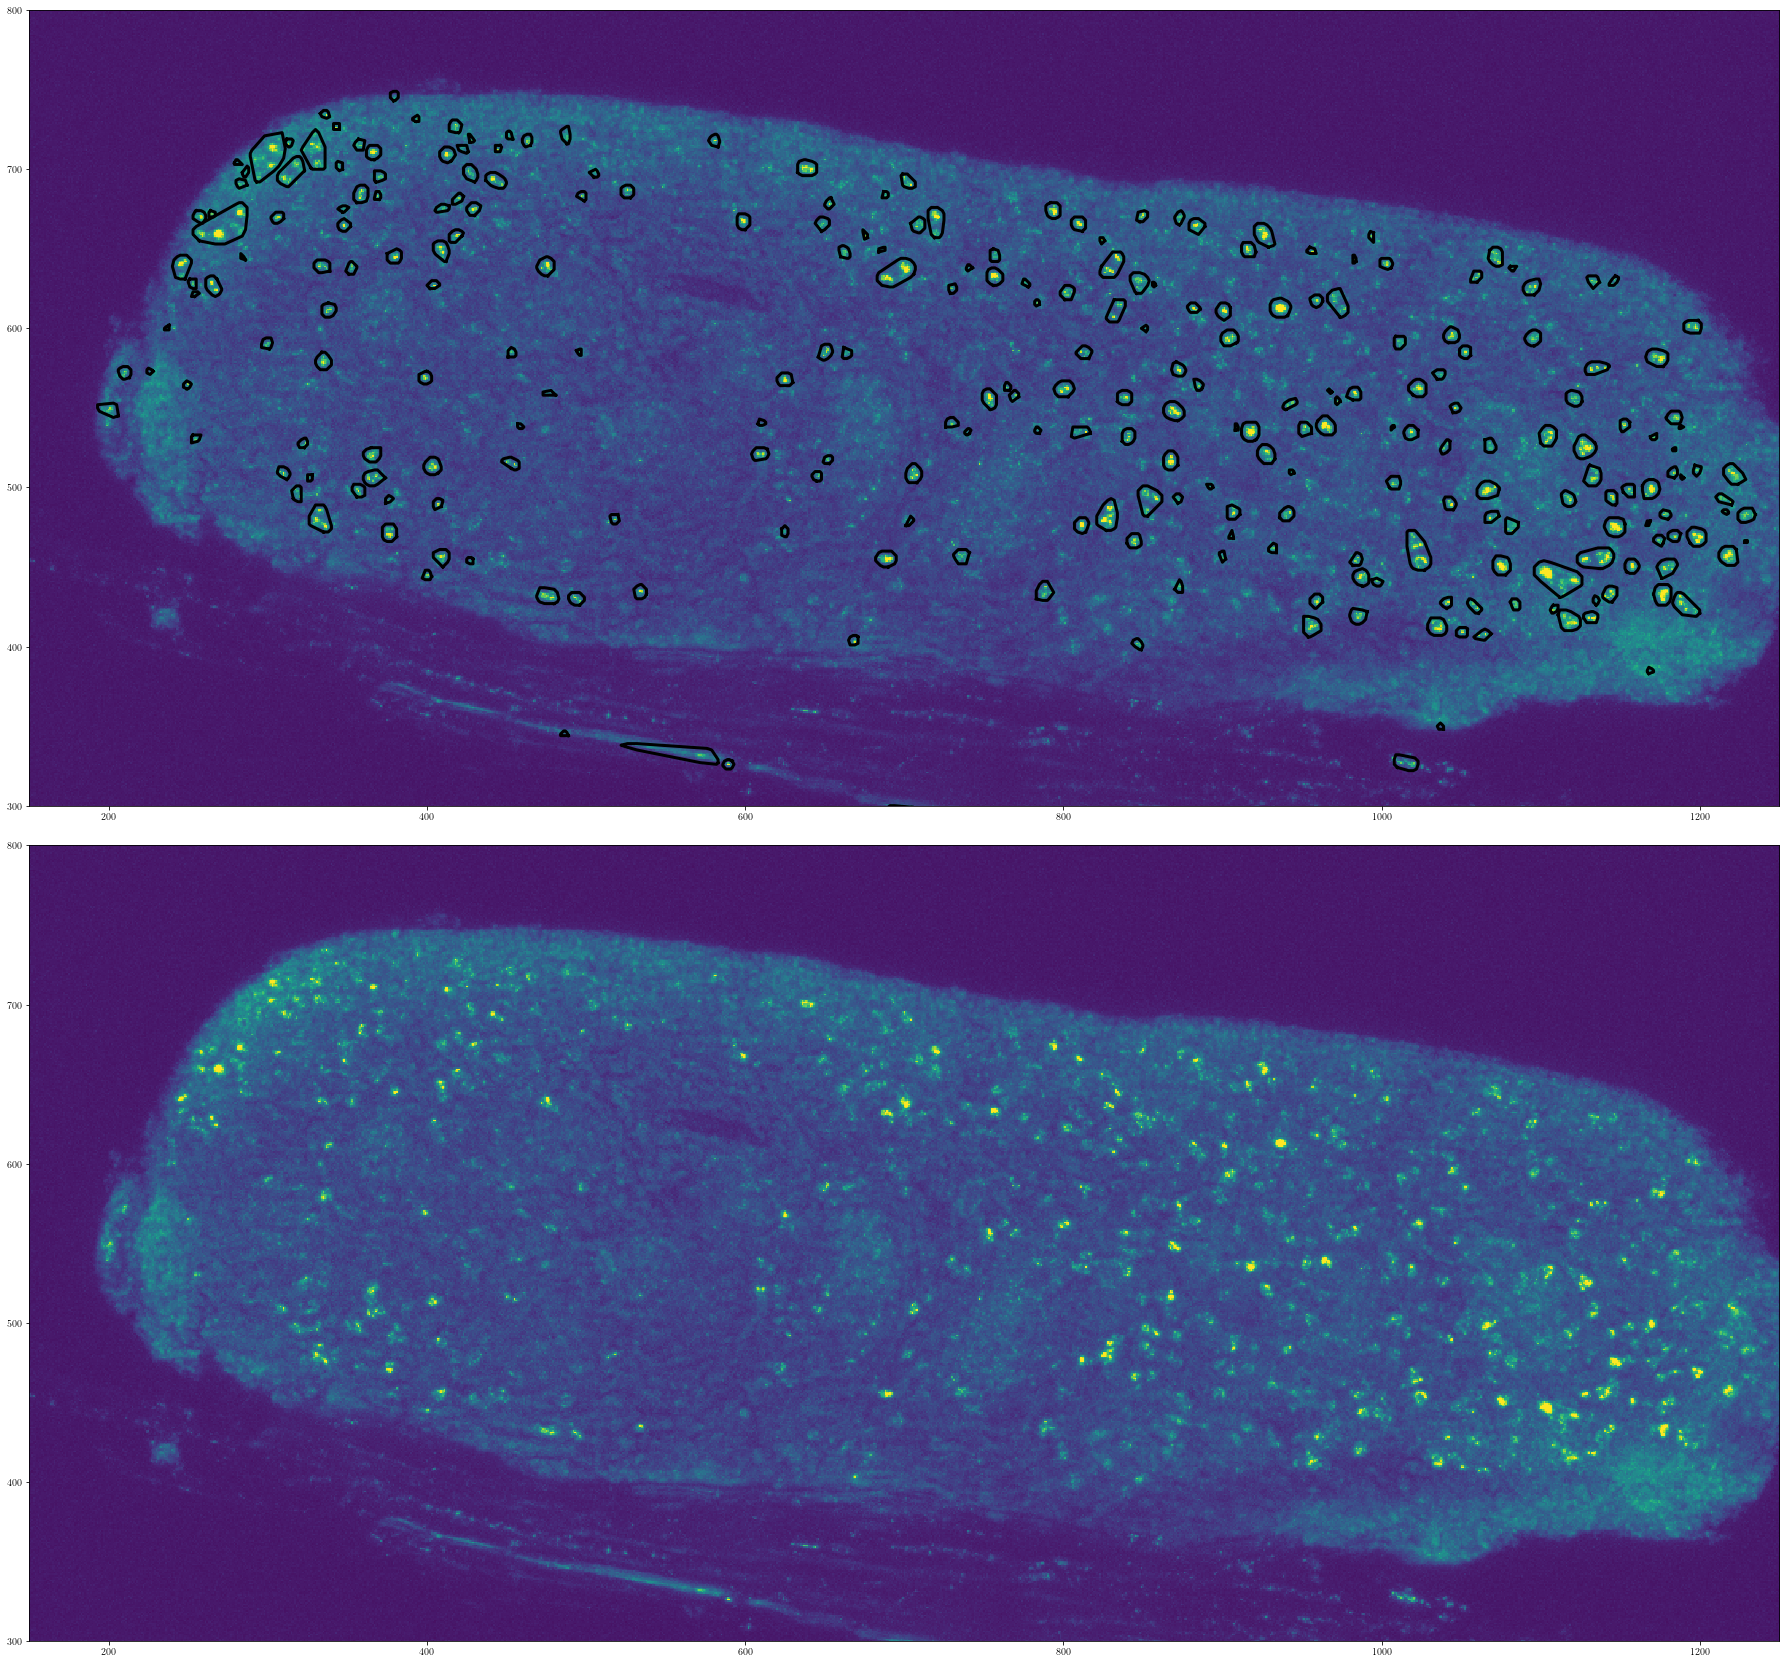

In [453]:
fig,axs=plt.subplots(2,1,figsize=(40,30))

i0 = 400
#axs[0].imshow(avgInt,zorder=0,origin='lower',vmin=0,vmax=i0*bmp_im1.shape[0])
axs[0].imshow(maxProj,zorder=0,origin='lower',vmin=0,vmax=i0)
axs[1].imshow(maxProj,zorder=0,origin='lower',vmin=0,vmax=i0)

for i in range(len(hull2Dvertices)):
    vlist = hull2Dvertices[i]
    axs[0].plot(vlist[:,1],vlist[:,0],'-',zorder=1,color='black',lw=3)


for ax in axs:
    ax.set_ylim(300,800)
    ax.set_xlim(150,1250)
    
plt.subplots_adjust(hspace=0.05)

plt.savefig('{0}/segmented_bmp_model_{1}.jpg'.format(outdir,modeldir),bbox_inches='tight')

IndexError: index 55 is out of bounds for axis 0 with size 49

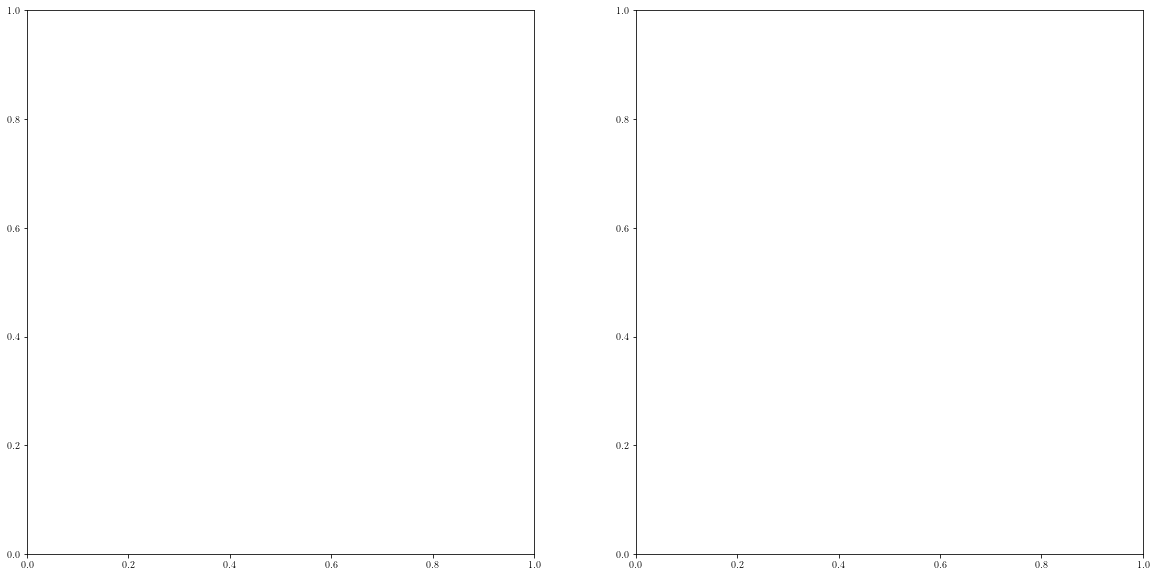

In [210]:
fig,axs=plt.subplots(1,2,figsize=(20,10))
i = 15
vs = clusts[i][hulls[i].vertices]
hull2 = ConvexHull(vs[:,1:3])
vs2   = vs[hull2.vertices,1:3]
vs2   = np.vstack([vs2,vs2[0]])
#vs = np.vstack([vs,vs[0]])

pad = 50
xmin = np.min(vs2[:,0])
xmax = np.max(vs2[:,0])
ymin = np.min(vs2[:,1])
ymax = np.max(vs2[:,1])


i0 = 300
#axs[0].imshow(avgInt,zorder=0,origin='lower',vmin=0,vmax=i0*bmp_im1.shape[0])
axs[0].imshow(maxProj,zorder=0,origin='lower',vmin=0,vmax=i0)


zmin = np.min(clusts[i][:,0])
zmax = np.max(clusts[i][:,0])

axs[1].imshow(np.max(bmp_im1[zmin:zmax],axis=0),zorder=0,origin='lower',
             vmin=0,vmax=i0)

for ax in axs:
    ax.set_ylim(xmin-pad,xmax+pad)
    ax.set_xlim(ymin-pad,ymax+pad)
    ax.plot(vs2[:,1],vs2[:,0],'-',zorder=1,color='black')



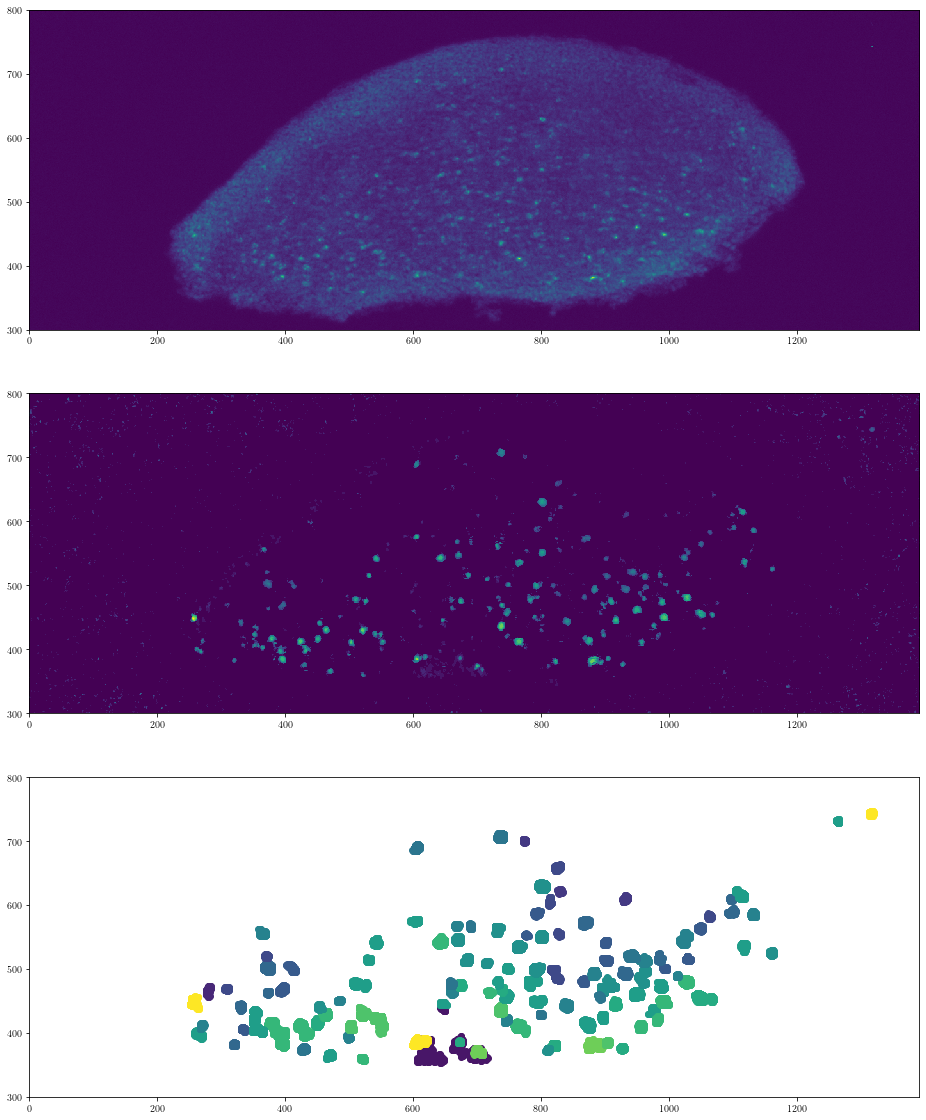

In [159]:
minclust = 10
cols = plt.cm.viridis(np.linspace(0,1,bmp_im1.shape[0]))

fig,axs=plt.subplots(3,1,figsize=(20,20))
axs[0].imshow(np.sum(bmp_im1,axis=0),origin='lower')
axs[1].imshow(np.sum(seg_prob_th[...,0],axis=0),origin='lower')

for clust in clustIdxs:
#     if len(clusts)>=minclust:
    ht = np.max(clust[:,0])
    axs[2].scatter(clust[:,2],clust[:,1],color=cols[ht])

for ax in axs:
    ax.set_ylim(300,800)
    
axs[2].set_xlim(0,bmp_im1.shape[2])
axs[2].set_aspect('equal')


# for i in range(nclusts):
#     if i in hulls:
#         vs = clusts[i][hulls[i].vertices]
#         vs = np.append(vs, vs[0])
#         axs.plot(sig_pixels[vs,2],sig_pixels[vs,1],'-',c='white',lw=2)

# axs[1].imshow(np.sum(1/seg[...,0],axis=0))
# axs[2].imshow(np.sum(seg_prob[...,0],axis=0))
# axs[3].imshow(np.sum(seg_prob_th[...,0],axis=0))

#axs.imshow(np.sum(seg_prob_th[...,0],axis=0),origin='lower')


In [52]:
%matplotlib notebook

<IPython.core.display.Javascript object>


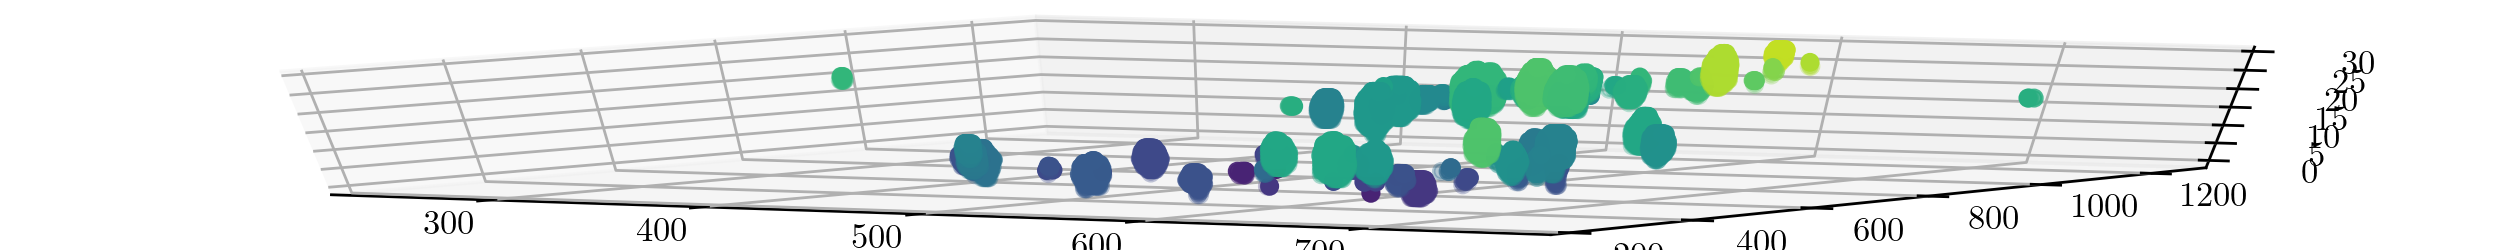

In [53]:
fig = plt.figure(figsize=(10,1))
ax = Axes3D(fig)
for clust in clusts[0:100]:
    if len(clusts)>=minclust:
        ht = np.max(sig_pixels[clust,0])
        ax.scatter(sig_pixels[clust,1],sig_pixels[clust,2],sig_pixels[clust,0],color=cols[ht])
#ax.scatter(sig_pixels[:,1],sig_pixels[:,2],sig_pixels[:,0])

In [ ]:
# how many of these clusters intersect with the surface generated by imsane? 
# if they do i can easily measure distance from midline
# if not... i can define midplane...
# or just somehow project bmp cells onto plane
# distance from point to plane -- this too is doable

In [168]:
surfmat = np.load('{0}/dapi_surface_matrix.npy'.format(outdir))
mask    = np.load('{0}/dapi_mask.npy'.format(outdir))
mask_dnsd    = np.load('{0}/dapi_mask_denoised.npy'.format(outdir))

In [165]:
surfPts = np.array([[int(surfmat[i,j]),i,j] for i in range(mask.shape[0]) 
                    for j in range(mask.shape[1]) if mask[i,j]>0])

In [166]:
surfPts.shape

(158349, 3)

In [26]:
zsc = 10/0.92
sig_pixels_sc = np.array(sig_pixels * np.array([zsc,1,1]),dtype='int')

In [27]:
np.max(sig_pixels_sc,axis=0)

array([  63,  748, 1230])

In [28]:
arr2set = lambda A: set([tuple(x) for x in A])

In [29]:
sig_pixels_on_surf_set = arr2set(sig_pixels_sc).intersection(arr2set(surfPts))

In [31]:
#np.array(sig_pixels_on_surf)

In [32]:
clust_sets = [arr2set(sig_pixels_sc[clust]) for clust in clusts]    

In [33]:
pixels_on_surf_per_clust = []
for i in range(len(clusts)):
    pixels_on_surf_per_clust.append(clust_sets[i].intersection(sig_pixels_on_surf_set))

In [35]:
#clust_sets[0].intersection(sig_pixels_on_surf_set)

In [36]:
clust_surf_pixel_counts = np.array(list(map(len,pixels_on_surf_per_clust)))
clust_pixel_counts      = np.array(list(map(len,clusts)))

In [37]:
thresh = 10
np.sum(clust_pixel_counts>thresh),np.sum(clust_surf_pixel_counts>0)

(92, 109)

In [38]:
np.where((clust_pixel_counts>thresh)&(clust_surf_pixel_counts>0))[0].shape[0]

84

In [39]:
np.count_nonzero(clust_surf_pixel_counts)

109

In [50]:
%matplotlib inline

/Users/simonfreedman/opt/anaconda3/envs/img/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


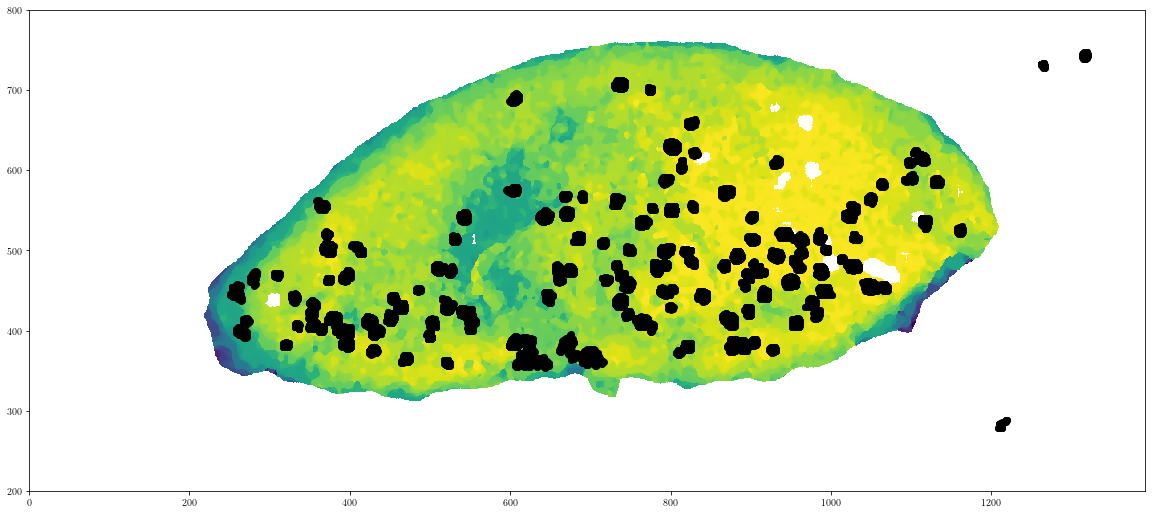

In [169]:
minclust = 10
cols = plt.cm.viridis(np.linspace(0,1,bmp_im1.shape[0]))

#masked_array = np.ma.masked_where(data == value, data)

cmap = plt.cm.viridis  # Can be any colormap that you want after the cm
cmap.set_bad(color='white')


fig,axs=plt.subplots(1,1,figsize=(20,10))
axs.imshow(-surfmat*1/mask_dnsd,origin='lower',cmap=cmap)

for clust in clustIdxs:
#     if len(clusts)>=minclust:
    #ht = np.max(sig_pixels[clust,0])
    axs.scatter(clust[:,2],clust[:,1],color='black')

axs.set_ylim(200,800)
    
axs.set_xlim(0,bmp_im1.shape[2])
axs.set_aspect('equal')


In [77]:
len(clust_surf_pixel_counts)

165

In [ ]:
# using denoised mask, 87/92 of clusters with more than 10 pixels 
#            intersect with the surface....
# using regular mask, 84/92 intersect with surface...

In [498]:
# using 3d segmentation algorithm on the image...
from skimage import segmentation as sg
from skimage.data import astronaut

In [525]:
print(sg.slic.__doc__)

Segments image using k-means clustering in Color-(x,y,z) space.

    Parameters
    ----------
    image : 2D, 3D or 4D ndarray
        Input image, which can be 2D or 3D, and grayscale or multichannel
        (see `multichannel` parameter).
    n_segments : int, optional
        The (approximate) number of labels in the segmented output image.
    compactness : float, optional
        Balances color proximity and space proximity. Higher values give
        more weight to space proximity, making superpixel shapes more
        square/cubic. In SLICO mode, this is the initial compactness.
        This parameter depends strongly on image contrast and on the
        shapes of objects in the image. We recommend exploring possible
        values on a log scale, e.g., 0.01, 0.1, 1, 10, 100, before
        refining around a chosen value.
    max_iter : int, optional
        Maximum number of iterations of k-means.
    sigma : float or (3,) array-like of floats, optional
        Width of Gaussi

In [534]:
img=astronaut()
img2=np.zeros_like(img)
img2[:,:,0]=img[:,:,0]
segments = sg.slic(img2, n_segments=100, compactness=10)
#segments = sg.slic(img[:,:,0], n_segments=100, compactness=10,convert2lab=True,multichannel=False)

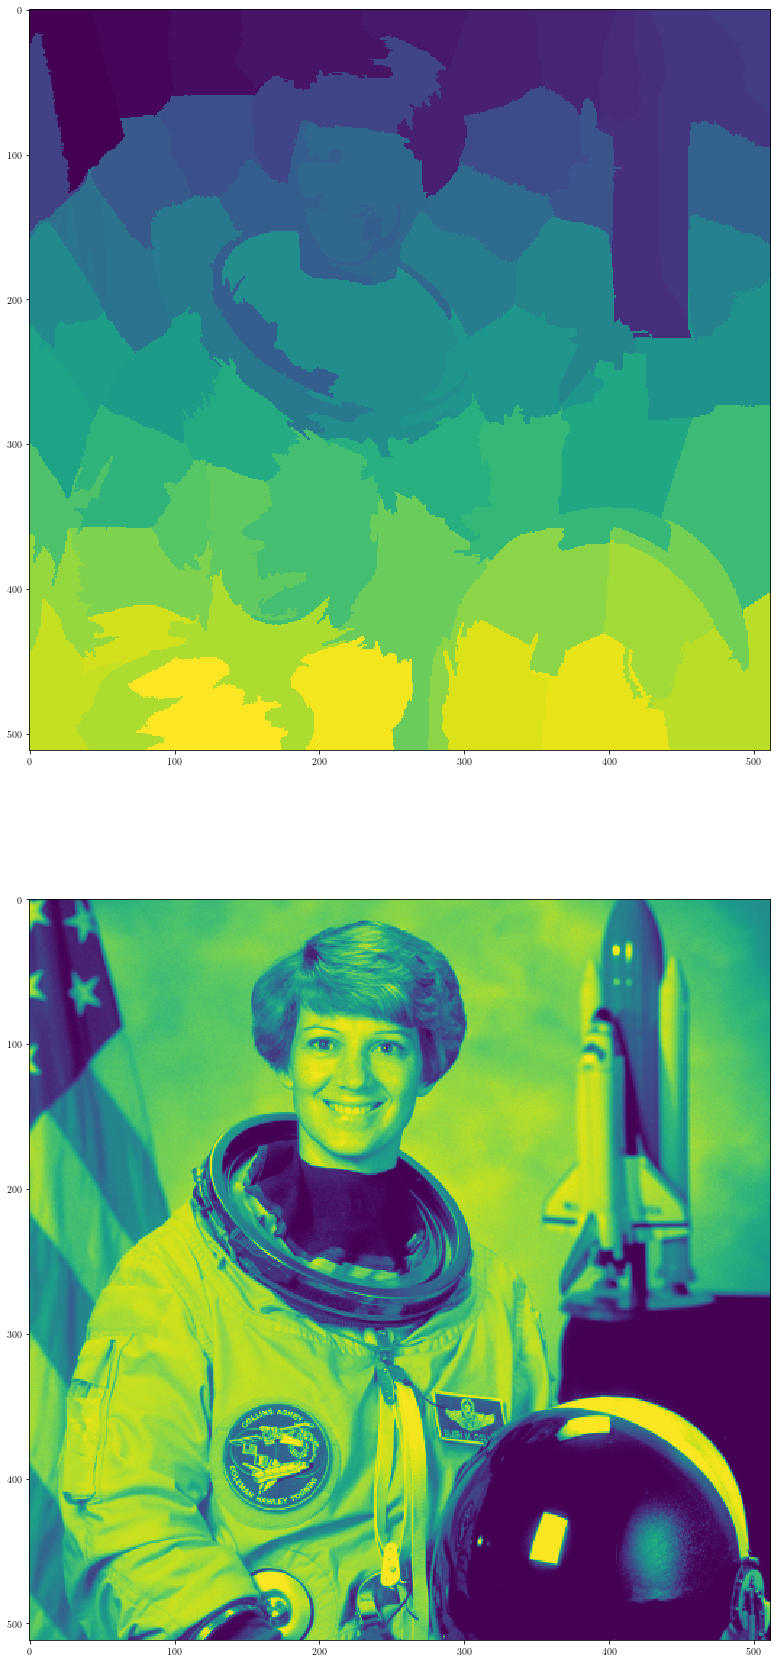

In [535]:
fig,axs=plt.subplots(2,1,figsize=(40,30))

i0 = 400
#axs[0].imshow(avgInt,zorder=0,origin='lower',vmin=0,vmax=i0*bmp_im1.shape[0])
axs[1].imshow(img[:,:,0],zorder=0)
#axs[0].imshow(clust100img,zorder=0,origin='lower')#,vmin=0,vmax=1)
axs[0].imshow(segments,zorder=0)#,vmin=0,vmax=1)

In [500]:
img.shape

(512, 512, 3)

In [537]:
np.max(img)

255

In [511]:
fig,axs=plt.subplots()
axs.plot

(512, 512)

In [485]:
mysegs = sg.slic(bmp_im1,multichannel=False,convert2lab=True)

In [543]:
maxproj2Drgb = np.zeros((maxProj.shape[0],maxProj.shape[1],3))
maxproj2Drgb[:,:,0]=np.array(np.around(maxProj/np.max(maxProj)*255),dtype='int')

In [591]:
myseg2D = sg.slic(maxproj2Drgb,n_segments=1000,compactness=1000)

In [592]:
#maxproj2Drgb.shape

In [593]:
n_slic_clusts = np.max(myseg2D)+1
n_slic_clusts

998

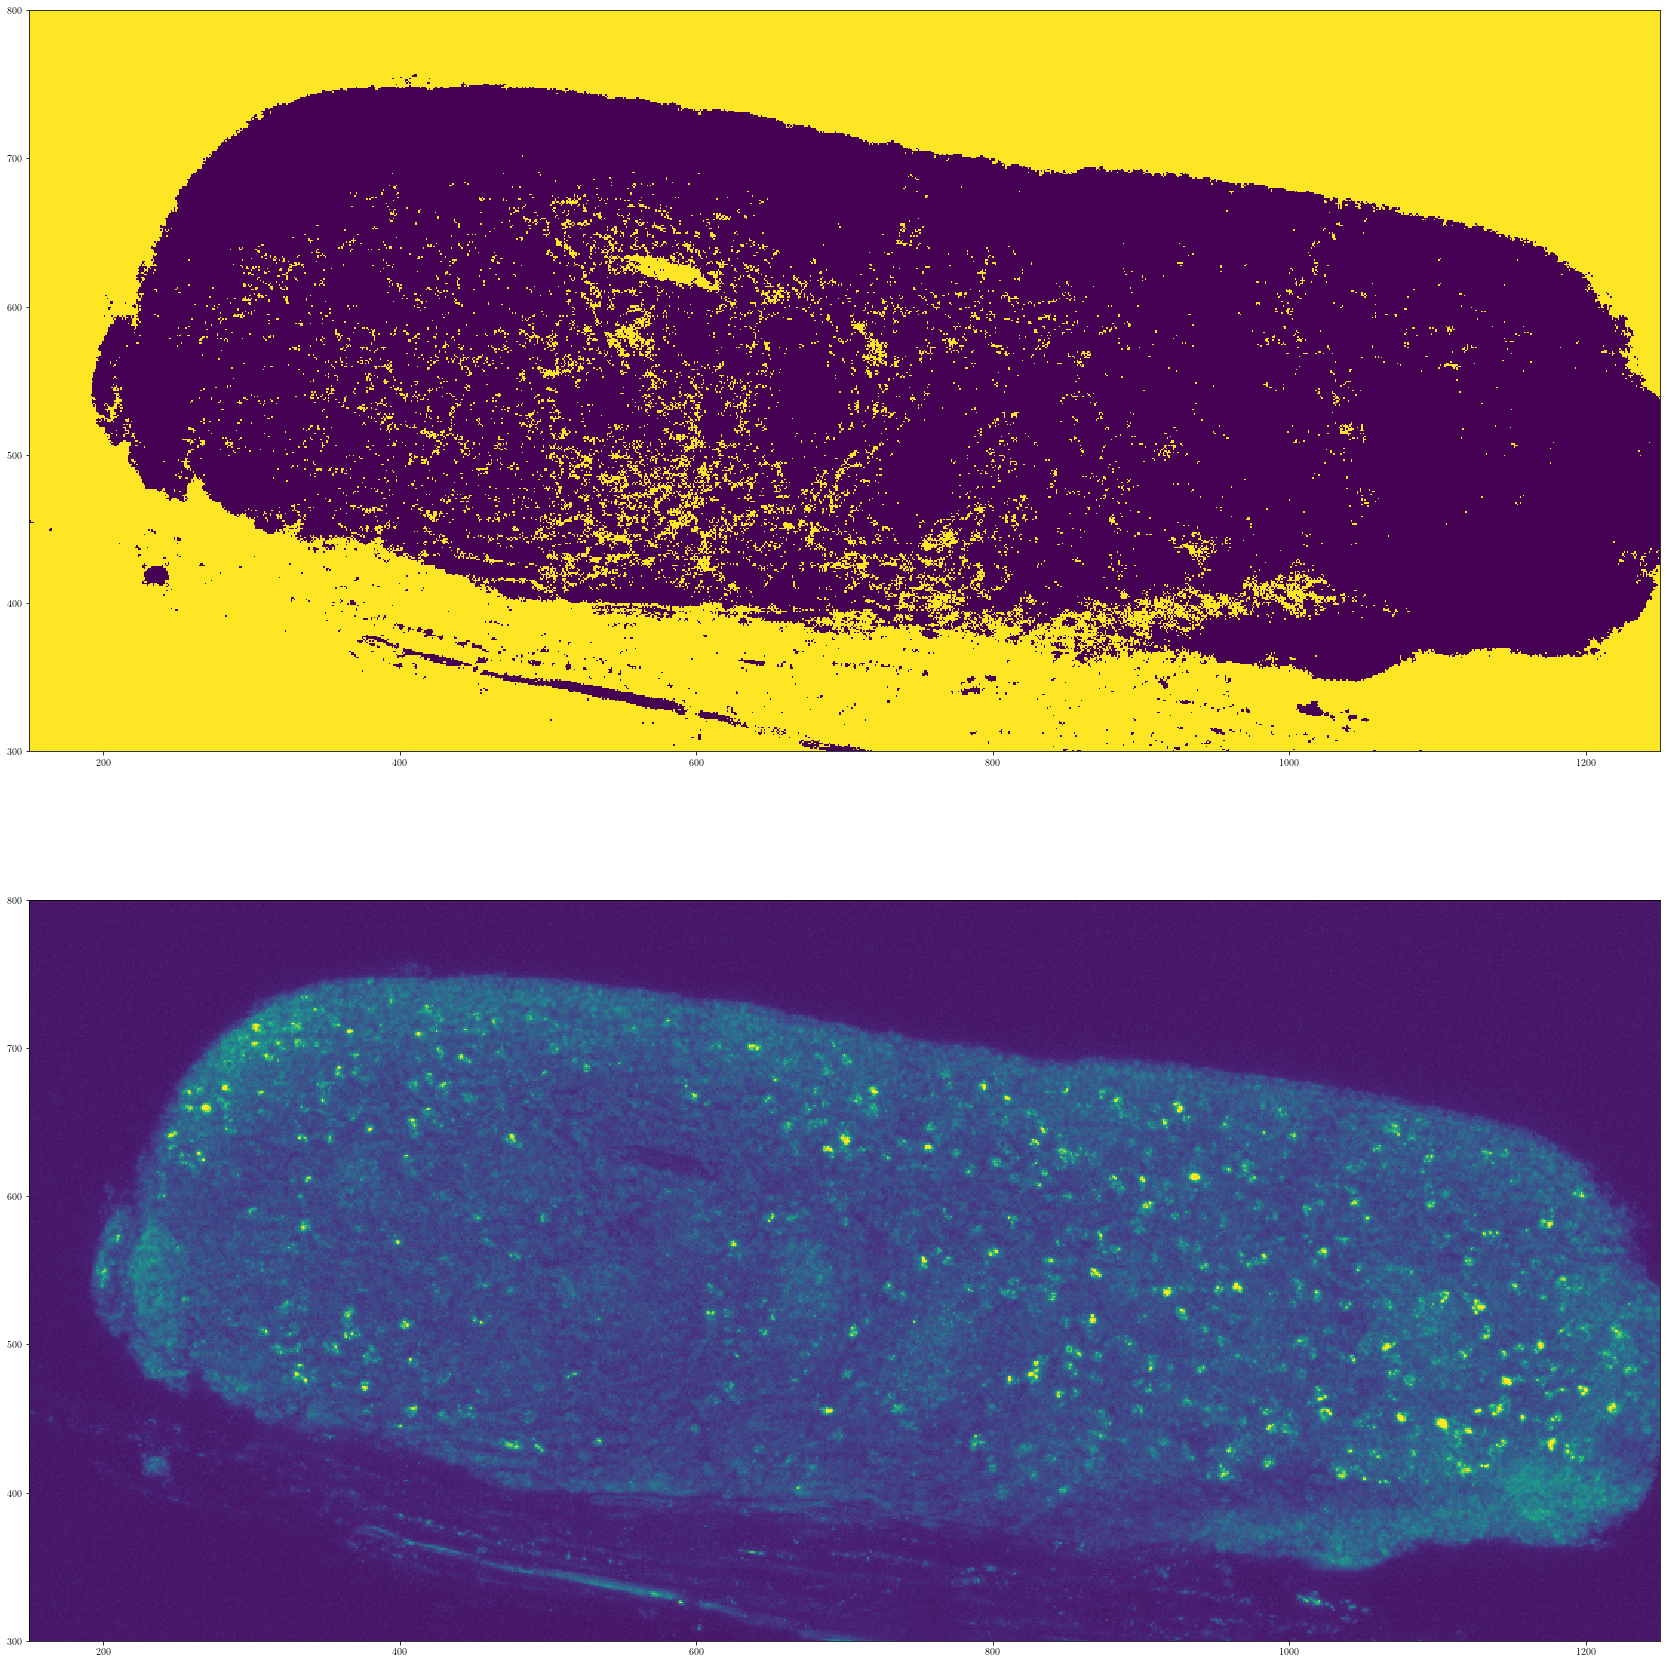

In [634]:
fig,axs=plt.subplots(2,1,figsize=(40,30))

i0 = 400
#axs[0].imshow(avgInt,zorder=0,origin='lower',vmin=0,vmax=i0*bmp_im1.shape[0])
axs[0].imshow(markers,zorder=0,origin='lower')#,vmin=0,vmax=1)
axs[1].imshow(maxProj,zorder=0,origin='lower',vmin=0,vmax=i0)
#axs[0].imshow(clust100img,zorder=0,origin='lower')#,vmin=0,vmax=1)


# axs[0].plot(clust100[:,2],clust100[:,0])
# for i in range(len(hull2Dvertices)):
#     vlist = hull2Dvertices[i]
#     axs[0].plot(vlist[:,1],vlist[:,0],'-',zorder=1,color='black',lw=3)


for ax in axs:
    ax.set_ylim(300,800)
    ax.set_xlim(150,1250)
    
# plt.subplots_adjust(hspace=0.05)

#plt.savefig('{0}/segmented_bmp_model_{1}.jpg'.format(outdir,modeldir),bbox_inches='tight')

In [497]:
#slic_clusts = [np.where(mysegs == i) for i in range(n_slic_clusts)]

In [508]:
idxs = np.where(myseg2D == 50)
clust100img  = np.zeros_like(bmp_im1[0])
clust100img[idxs[0],idxs[1]] = 1
#clust100MaxProj = np.sum()

In [595]:
wsSeg = sg.watershed(bmp_im1)

In [596]:
segmaxproj = np.max(wsSeg.shape

(33, 1040, 1392)

In [597]:
nclusts = np.max(wsSeg)+1

In [602]:
from skimage.filters import sobel

In [603]:
maxprojSobel = sobel(maxProj)

In [632]:
thresh = filters.threshold_otsu(maxProj)
foreground, background = 1,2
markers = np.zeros_like(maxProj)
markers[maxProj<=thresh]= background
markers[maxProj>thresh]=foreground

In [620]:
from skimage import data
coins = data.coins()

In [625]:
# Make segmentation using SLIC superpixels.
seg2 = sg.slic(coins, n_segments=117, max_iter=160, sigma=1, compactness=0.75,
            multichannel=False)

In [623]:
np.max(coins)

252

In [611]:
ws = sg.watershed(maxprojSobel,markers)
seg1 = measure.label(ws == foreground)

In [616]:
seg2 = sg.slic(maxprojSobel, n_segments=117, max_iter=160, sigma=1, compactness=0.75,
            multichannel=False)

In [ ]:
fig,axs=plt.su

In [606]:
np.histogram(maxprojSobel)

(array([1437307,    8274,    1488,     375,     110,      68,      27,
             19,       8,       4]),
 array([0.        , 0.00091699, 0.00183399, 0.00275098, 0.00366798,
        0.00458497, 0.00550196, 0.00641896, 0.00733595, 0.00825295,
        0.00916994]))

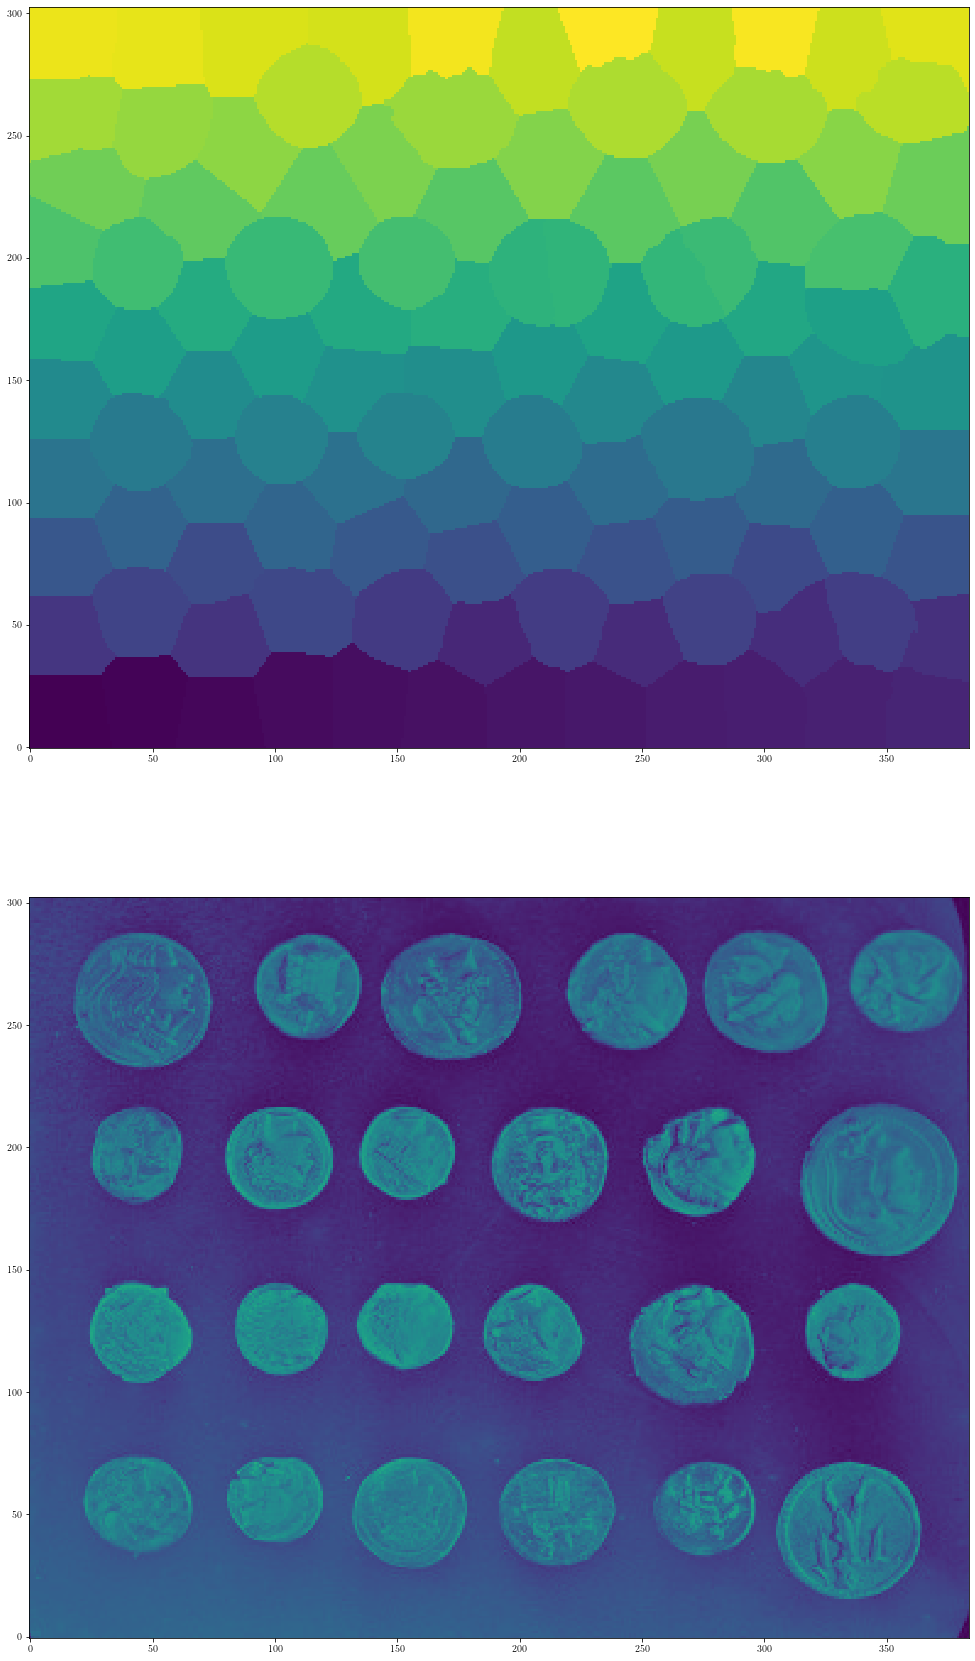

In [629]:
fig,axs=plt.subplots(2,1,figsize=(40,30))

i0 = 400
axs[1].imshow(coins,zorder=0,origin='lower',vmin=0,vmax=i0)
axs[0].imshow(seg2,zorder=0,origin='lower')#,vmin=0,vmax=1)


# axs[0].plot(clust100[:,2],clust100[:,0])
# for i in range(len(hull2Dvertices)):
#     vlist = hull2Dvertices[i]
#     axs[0].plot(vlist[:,1],vlist[:,0],'-',zorder=1,color='black',lw=3)


# for ax in axs:
#     ax.set_ylim(300,800)
#     ax.set_xlim(150,1250)
    
# plt.subplots_adjust(hspace=0.05)

In [598]:
nclusts

6279307

In [599]:
np.histogram(wsSeg,mask)

(array([4587879, 4849500, 4851192, 4859387, 4841035, 4854532, 4821284,
        4804628, 4805068, 4498935]),
 array([1.0000000e+00, 6.2793150e+05, 1.2558620e+06, 1.8837925e+06,
        2.5117230e+06, 3.1396535e+06, 3.7675840e+06, 4.3955145e+06,
        5.0234450e+06, 5.6513755e+06, 6.2793060e+06]))

In [600]:
np.unique(wsSeg)

array([      1,       2,       3, ..., 6279304, 6279305, 6279306],
      dtype=int32)

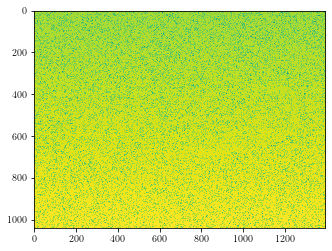

In [601]:
fig,axs=plt.subplots()
axs.imshow(np.max(wsSeg,axis=0))

In [630]:
thresh

68

In [631]:
fig,axs=plt.subplots(1,1,figsize=)

In [636]:
thresh = filters.threshold_otsu(bmp_im1)
foreground, background = 0,1
markers = np.zeros_like(bmp_im1)
markers[bmp_im1<=thresh]= background
markers[bmp_im1>thresh]=foreground

In [645]:
all_labels = measure.label(markers)
nclusts    = np.max(all_labels)+1

In [646]:
all_clusts = [[] for i in range(nclusts)]
dims = markers.shape
for i in range(dims[0]):
    for j in range(dims[1]):
        for k in range(dims[2]):
            all_clusts[all_labels[i,j,k]].append([i,j,k])
            

In [647]:
clust_lens = np.array(list(map(len,all_clusts)))

In [653]:
np.histogram(clust_lens,np.arange(20))

(array([   0, 9156, 1670,  477,  195,  105,   52,   29,   22,   15,   11,
           7,    3,    6,    5,    1,    1,    4,    5]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]))

In [651]:
#thresh = filters.threshold_otsu(clust_lens[1:])

thresh = 10
bigClustIdxs = np.where(clust_lens[1:]>thresh)[0]
clusts       = [np.array(all_clusts[i+1]) for i in bigClustIdxs]

# compute 2d hull coordinates
hulls2D        = [ConvexHull(clusts[i][:,1:]) for i in range(len(clusts))]
hull2Dvertices = [clusts[i][hulls2D[i].vertices,1:] for i in range(len(clusts))]
hull2Dvertices = [np.vstack([verts, verts[0]]) for verts in hull2Dvertices]
#hulls3D        = [ConvexHull(clust) for clust in clusts]

In [655]:
len(hull2Dvertices)

53

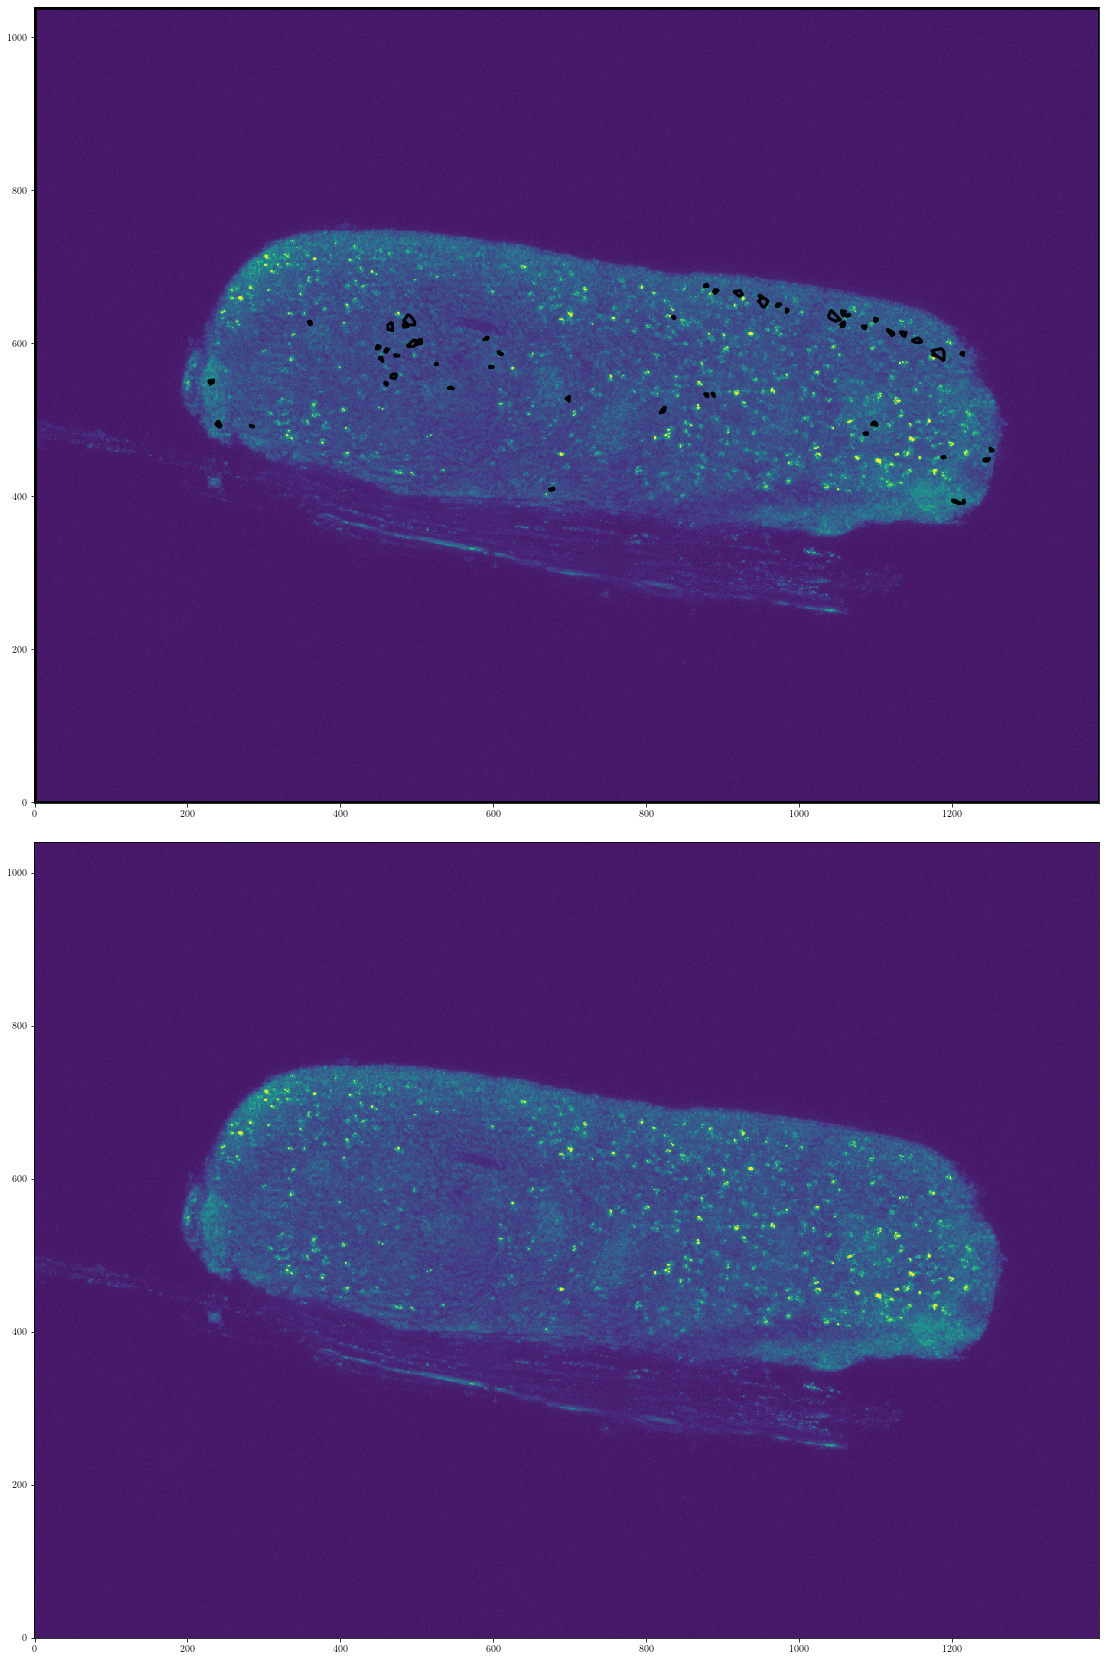

In [654]:
fig,axs=plt.subplots(2,1,figsize=(40,30))

i0 = 400
#axs[0].imshow(avgInt,zorder=0,origin='lower',vmin=0,vmax=i0*bmp_im1.shape[0])
axs[0].imshow(maxProj,zorder=0,origin='lower',vmin=0,vmax=i0)
axs[1].imshow(maxProj,zorder=0,origin='lower',vmin=0,vmax=i0)

for i in range(len(hull2Dvertices)):
    vlist = hull2Dvertices[i]
    axs[0].plot(vlist[:,1],vlist[:,0],'-',zorder=1,color='black',lw=3)


# for ax in axs:
#     ax.set_ylim(300,800)
#     ax.set_xlim(150,1250)
    
plt.subplots_adjust(hspace=0.05)

#plt.savefig('{0}/segmented_bmp_model_{1}.jpg'.format(outdir,modeldir),bbox_inches='tight')

In [ ]:
np.histogram()